# ECMM422 Machine Learning
## Course Assessment 1


This course assessment (CA1) represents 40% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the College website.


**Note:**
1. do not change the name of this notebook, i.e. the notebook file has to be named: ca1.ipynb
2. do not remove/delete any cell
3. do not add any cell (you can work on a draft notebook and only copy the function implementations here)
4. do not add you name or student code in the notebook or in the file name

**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

Each question is awarded a number of marks. 

A (hidden) unit test is going to evaluate if all desired properties of the required function(s) are met. 

If the test passes all the associated marks are awarded, if it fails 0 marks are awarded. The large number of questions allows a fine grading. 

## Notes:

In the rest of the notebook, the term `data matrix` refers to a two dimensional numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances each with four features.  

When a required function can be implemented directly by a library function it is intended that the candidate should write her own implementation of the function, e.g. a function to compute the accuracy or the cross validation.

Some questions are just a check-point, i.e. it is for you to see that you are correctly implementing all functions. Since those check-points use functions that you have already implemented and that have already been marked, those questions are not going to be marked (i.e. they appear as having marks 0).

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# unit test utilities: you can ignore these function
def is_approximately_equal(test,target,eps=1e-2):
    return np.mean(np.fabs(np.array(test) - np.array(target)))<eps

def assert_test_equality(test, target):
    assert is_approximately_equal(test, target), 'Expected:\n %s \nbut got:\n %s'%(target, test)

## Question 1  [marks 6]

a) Make a function `data_matrix = make_data_classification(mean, std, n_centres, inner_std, n_samples, random_seed=42)` to create a data matrix according to the following rules:
1. `mean` is a n-dimensional vector (say [1,1], but the function should allow vectors of any dimension)
2. `n_centres` is the number of centres (say 3) 
3. `std` is the standard deviation (say 1)
4. the centres are sampled from a Normal distribution with mean `mean` and standard deviation `std`
5. from each centre sample `n_samples` from a Normal distribution with the centre as the mean and standard deviation `inner_std`
so if `mean=[1,1]` `n_centres=3` and `n_samples=10` then the data matrix will be a 30 rows x 2 columns numpy array.

b) Make a function `data_matrix, targets = make_data_regression(mean, std, n_centres, inner_std, n_samples, random_seed=42)` to create a data matrix  and a target vector according to the following rules:
1. the data matrix is constructed in the same way as in `make_data_classification`
2. the targets are the Euclidean distance between the sample and the centre of the generating Normal distribution

See Question 3 for a graphical example of the expected output.

In [3]:
import warnings
warnings.filterwarnings('ignore')

def make_data_classification(mean, std, n_centres, inner_std, n_samples, random_seed=42):
    np.random.seed(seed=random_seed)
    samples = []
    
    for _ in range(n_centres): 
        centre = np.random.normal(mean, std)
        for _ in np.linspace(0,n_samples, round(n_samples)):
            samples.append(np.random.normal(centre, inner_std))
    
    samples = np.vstack(samples)
    return samples

def make_data_regression(mean, std, n_centres, inner_std, n_samples, random_seed=42):
    np.random.seed(seed=random_seed)
    samples = []
    targets = []
    
    for _ in range(n_centres): 
        centre = np.random.normal(mean, std)
        for _ in range(n_samples):
            sample = np.random.normal(centre, inner_std)
            samples.append(sample)
            targets.append(np.linalg.norm(sample-centre))
    
    samples, targets = np.vstack(samples), np.vstack(targets)
    return samples, targets

In [4]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [5]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2  [marks 2]

a) Make a function `data_matrix, targets = get_dataset_classification(n_samples, std, inner_std)` to create a data matrix and a target vector for a binary classification problem according to the following rules:
- the instances from the positive class are generated according to the same rules provided for `make_data_classification`; so are the instances from the negative class 
- the number of samples for the postive and negative class are balanced
- instances from the positive class have as mean the vector [10,10] and those from the negative class, vector [-10,-10]
- the number of centres is fixed to 3
- the random seed is fixed to 42
- `n_samples` indicates the total number of instances finally available in the output `data_matrix`

b) Make a function `data_matrix, targets = get_dataset_regression(n_samples, std, inner_std)` to create a data matrix according to the following rules:
- the instances are generated according to the same rules provided for `make_data_regression`
- the targets are generated according to the same rules provided for `make_data_regression`
- instances have as mean the vector [10,10]
- the number of centres is fixed to 3
- the random seed is fixed to 42
- `n_samples` indicates the total number of instances finally available in the output `data_matrix`

In [6]:
def get_dataset_classification(n_samples, std, inner_std):
    instance_positive = make_data_classification([10,10], std, 3, inner_std, n_samples / (2 * 3), random_seed=42)
    instance_negative = make_data_classification([-10,-10], std, 3, inner_std, n_samples / (2 * 3), random_seed=42)
    targets = [1]*len(instance_positive) + [-1]*len(instance_negative)
    dm = np.concatenate((instance_positive, instance_negative))
    print((len(dm), len(targets)))
    return dm, np.asarray(targets)

def get_dataset_regression(n_samples, std, inner_std):
    return make_data_regression([10,10], std, 3, inner_std, n_samples//3, random_seed=42)

In [7]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3  [marks 1]

Make a function `plot(X,y)` to display the scatter plot of a data matrix of two dimensional instances using the array `y` to assign the colour to the instances.


When running 

```python
X, y = get_dataset_regression(n_samples=600, std=30, inner_std=5)
plot(X,y)
```
you should get something like

<img src='plot3.png' width=300>

and when running

```python
X, y = get_dataset_classification(n_samples=600, std=30, inner_std=5)
plot(X,y)
```
you should get something like

<img src='plot3b.png' width=300>

In [8]:
def plot(X,y):
    assert X.ndim == 2
    x0,x1 = X.T
    plt.figure(figsize=(7,7))
    if y is None:
        plt.scatter(x0,x1,edgecolor='w')
    else:
        plt.scatter(x0,x1,c=y,edgecolor='w')
    plt.grid()
    plt.show()

In [9]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 4  [marks 1]

Make a function `classification_error(targets, preds)` to compute the fraction of times that the entries in `targets` do not agree with the corresponding entries in `preds`.

**Note:** do not use library functions to compute the result directly but implement your own version.

In [10]:
def classification_error(targets, preds):
    assert len(targets) == len(preds)
    return np.sum(np.asarray(targets) != np.asarray(preds)) / len(targets)

In [11]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 5  [marks 2]

Make a function `regression_error(targets, preds)` to compute the mean squared error between `targets` and `preds`.

$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(T_{i}-{ {P_{i}}})^{2}.}$$

**Note:** do not use library functions to compute the result directly but implement your own version.

In [12]:
def regression_error(targets, preds):
    total = 0
    
    for i in range(len(targets)):
        square_val = np.square(targets[i] - preds[i])
        total += square_val
        
    error = total/len(targets)
    
    return error

In [13]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 6  [marks 7]

Make a function `make_bootstrap(data_matrix, targets)` to extract a bootstrapped replicate of an input dataset. 

The function should return the following 6 elements (in this order): `bootstrap_data_matrix, bootstrap_targets, bootstrap_sample_ids, oob_data_matrix, oob_targets, oob_samples_ids`, where:
1. `bootstrap_data_matrix`: is a data matrix encoding the bootstrapped replicate of the data matrix; the number of instances in `bootstrap_data_matrix` is equal to the number of instances in `data_matrix`
2. `bootstrap_targets`: is the corresponding bootstrapped replicate of the target vector
3. `bootstrap_sample_ids`: is an array containing the instance indices of the bootstrapped replicate of the data matrix
4. `oob_data_matrix`: is a data matrix encoding the out of bag instances 
5. `oob_targets`: is the corresponding out of bag instances of the target vector
6. `oob_samples_ids`: is an array containing the instance indices of the out of bag instances 

In [14]:
def make_bootstrap(data_matrix, targets):
    assert len(targets) == len(data_matrix)
    bootstrap_data_matrix = []
    bootstrap_targets = []
    bootstrap_sample_ids = []
    oob_data_matrix = []
    oob_targets = []
    oob_samples_ids = set()
    
    for _ in range(len(targets)):
        rand = np.random.randint(len(targets))
        bootstrap_data_matrix.append(data_matrix[rand])
        bootstrap_targets.append(targets[rand])
        bootstrap_sample_ids.append(rand)
    
    for i in range(len(targets)):
        if i not in bootstrap_sample_ids:
            oob_data_matrix.append(data_matrix[i])
            oob_targets.append(targets[i])
            oob_samples_ids.add(i)
    
    bootstrap_data_matrix, bootstrap_targets  = np.vstack(bootstrap_data_matrix), np.vstack(bootstrap_targets)
    if len(oob_targets) > 0:
        oob_data_matrix, oob_targets = np.vstack(oob_data_matrix), np.vstack(oob_targets)
    return bootstrap_data_matrix, bootstrap_targets, bootstrap_sample_ids, oob_data_matrix, oob_targets, oob_samples_ids

In [15]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [16]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 7  [marks 10]

Consider the following functional blueprints `estimator = train(X_train, y_train, param)` and `test(X_test, estimator)`. A function of type `train` takes in input a data matrix `X_train` a target vector `y_train` and a single value `param` (not a list of parameters). A function of type `train` outputs an object that represent an estimator. A function of type `test` takes in input a data matrix `X_test` the fit object `estimator` and outputs the predicted targets.

Using this blueprint, write the specialised train and test functions for the following classifiers and regressors (use the function signature provided in the next cell, e.g. `train_ab` for training an adaboost classifier):

Classifiers:
- a) k-nearest-neighbor: the parameter controls the number of neighbors (you may use KNeighborsClassifier from scikit) `[train_knn, test_knn]`
- b) adaboost: the parameter controls the maximal depth of the decision tree uses as weak classifier (you may use the DecisionTreeClassifier from scikit but **you should provide your own implementation of the boosting algorithm**) `[train_ab, test_ab]`
- c) random forest: the parameter controls the maximal depth of the tree (you may use the DecisionTreeClassifier from scikit but **you should provide your own implementation of the bagging algorithm**) `[train_rfc, test_rfc]`

Regressors:
- d) decision tree: the parameter controls the maximal depth of the tree (you may use the DecisionTreeRegressor from scikit) `[train_dt, test_dt]`
- e) svm linear: the parameter controls the regularization constant C (you may use SVR from scikit) `[train_svm_1, test_svm]`
- f) svm with a polynomial kernel of degree 2: the parameter controls the regularization constant C  (you may use SVR from scikit) `[train_svm_2, test_svm]`
- g) svm with a polynomial kernel of degree 3: the parameter controls the regularization constant C  (you may use SVR from scikit) `[train_svm_3, test_svm]`
- h) random forest: the parameter controls the maximal depth of the tree (you may use the DecisionTreeRegressor from scikit but **you should provide your own implementation of the bagging algorithm**) `[train_rf, test_rf]`

For the algorithms `adaboost` and `random forest`, the size of the ensemble should be fixed to 100.

In [17]:
# classifiers
from sklearn.neighbors import KNeighborsClassifier

def train_knn(X_train, y_train, param):
    classifier = KNeighborsClassifier(n_neighbors=param)
    classifier.fit(X_train, y_train)
    
    return classifier

def test_knn(X_test, est):
    return est.predict(X_test)


from sklearn.tree import DecisionTreeClassifier

def error(targets, preds, weights=None):
    if weights is None:
        acc = np.sum(targets==preds)/len(preds)
    else:
        accs = weights[targets==preds]
        acc = np.sum(accs)/np.sum(weights)
    return 1.0 - acc

def initialise_weights(X):
    n_instances = X.shape[0]
    Wm = np.ones(n_instances)/n_instances  
    return Wm

def update_weights(Wm, preds, targets):
    e = error(targets, preds, Wm)
    alpha = 0.5 * np.log((1-e)/e)           #Weight of the newly trained tree
    Wm = Wm * np.exp(alpha*(preds!=targets))#Update weights      
    Wm = Wm / np.sum(Wm)                    #Normalize the weights to sum upto 1
    return Wm, alpha, e

def train_ab(X_train, y_train, param):
    models = [] 
    errors = []
    alphas = []
    weights = []
    Wm = initialise_weights(X_train)
    
    for m in range(100):
        """find and predict using a weak classifier: a decision tree of depth=max_depth """
        clf = DecisionTreeClassifier(max_depth=param).fit(X_train,y_train,sample_weight=Wm)
        preds = clf.predict(X_train)
        
        """update instances' weights based on predictive error"""
        Wm, alpha, e = update_weights(Wm, preds, y_train)
        
        models.append((alpha,clf))       #Store the trained model (clf) and its weight (alpha)

        """Log info for downstream analysis"""
        errors.append(e)          
        alphas.append(alpha)      
        weights.append(Wm.copy())

    return models
    

def test_ab(X_test, models):
    preds = np.hstack([alpha * clf.predict(X_test).reshape(-1,1) for alpha,clf in models])
    preds = np.sign(np.sum(preds, axis=1))
    return preds

from sklearn.tree import DecisionTreeClassifier

def train_rfc(X_train, y_train, param):
    dt_classifiers = []
    
    for i in range(100):
        train_sample, target_sample, id_sample, _, _, _ = make_bootstrap(X_train, y_train)
        dt_classifier = DecisionTreeClassifier(max_depth=param)
        
        dt_classifier.fit(train_sample, target_sample)
        dt_classifiers.append(dt_classifier)
    
    return dt_classifiers

def test_rfc(X_test, models):
    prediction = models[0].predict(X_test)
    
    for i in range(1, len(models)):
        prediction += models[i].predict(X_test)
    
    return prediction / len(models)


# regressors
from sklearn.tree import DecisionTreeRegressor

def train_dt(X_train, y_train, param):
    regressor = DecisionTreeRegressor(max_depth=param)
    regressor.fit(X_train, y_train)
    return regressor

def test_dt(X_test, est):
    return est.predict(X_test)

from sklearn.svm import SVR

def train_svm_1(X_train, y_train, param):
    svr_lin = SVR(kernel='linear', C=param)
    svr_lin.fit(X_train, y_train)
    return svr_lin

def train_svm_2(X_train, y_train, param):
    svr_deg_2 = SVR(kernel='poly', degree=2, C=param)
    svr_deg_2.fit(X_train, y_train)
    return svr_deg_2

def train_svm_3(X_train, y_train, param):
    svr_deg_3 = SVR(kernel='poly', degree=3, C=param)
    svr_deg_3.fit(X_train, y_train)
    return svr_deg_3

#Note: you do not need to specialise the svm test function for each degree
def test_svm(X_test, est):
    return est.predict(X_test)

from sklearn.tree import DecisionTreeRegressor

def train_rf(X_train, y_train, param):
    dt_regressors = []
    
    for i in range(100):
        train_sample, target_sample, id_sample, _, _, _ = make_bootstrap(X_train, y_train)
        dt_regressor = DecisionTreeRegressor(max_depth=param)
        
        dt_regressor.fit(train_sample, target_sample)
        dt_regressors.append(dt_regressor)
    
    return dt_regressors

def test_rf(X_test, models):
    prediction = models[0].predict(X_test)
    
    for i in range(1, len(models)):
        prediction += models[i].predict(X_test)
    
    return prediction / len(models)

In [18]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [19]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [20]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [21]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [22]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [23]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 8  [marks 0]

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. Since this cell uses functions that you have already implemented and that have already been marked, this Question is not going to be marked.


Make a dataset using

```python
X, y = get_dataset_classification(n_samples=240, std=30, inner_std=10)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

```

and check that the classification error for 
- k-nearest-neighbor
- random forest classifier
- adaboost

In [24]:
# Just run the following code, do not modify it
X, y = get_dataset_classification(n_samples=240, std=30, inner_std=10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
param=3
e_knn = classification_error(y_test, test_knn(X_test, train_knn(X_train, y_train, param)))
e_rfc = classification_error(y_test, test_rfc(X_test, train_rfc(X_train, y_train, param)))
e_ab = classification_error(y_test, test_ab(X_test, train_ab(X_train, y_train, param)))
print(e_knn, e_rfc, e_ab)

(240, 240)
0.125 0.5138888888888888 0.18055555555555555


## Question 9  [marks 0]

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. Since this cell uses functions that you have already implemented and that have already been marked, this Question is not going to be marked.

Make a dataset using

```python
X, y = get_dataset_regression(n_samples=120, std=30, inner_std=10)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

```

and check that the regression error for these regressors
- decision tree
- svm with polynomial kernel of degree 2
- svm with polynomial kernel of degree 3

is approximately comparable.

In [25]:
# Just run the following code, do not modify it
X, y = get_dataset_regression(n_samples=120, std=30, inner_std=10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
param=3
e_dt = regression_error(y_test, test_dt(X_test, train_dt(X_train, y_train, param)))
e_svm2 = regression_error(y_test, test_svm(X_test, train_svm_2(X_train, y_train, param)))
e_svm3 = regression_error(y_test, test_svm(X_test, train_svm_3(X_train, y_train, param)))
print(e_dt, e_svm2, e_svm3)

[50.74588326] [52.06306265] [52.43235773]


## Question 10  [marks 10]

Make a function `sizes, train_errors, test_errors = compute_learning_curve(train_func, test_func, param, X, y, test_size, n_steps, n_repetitions)` to compute the train and test errors as mandated in the learning curve approach.  

The regressor will be trained via `train_func` on the problem `data_matrix`, `targets` with parameter `param`. The estimate will be done averaging a number of replicates equal to `n_repetitions`, i.e. the code needs to repeat the process  `n_repetitions` times (say 10) and average the error. 

Note that a fraction of the data as indicated by `test_size` (say 0.3 for 30%) is going to be reserved for testing purposes. The remaining amount of data can be used in the training phase. The learning curve should be computed for an amount of training material that varies from a **minimum of 2 instances** up to all the instances available for training. The paramter `n_steps` defines the number of datasets of different size that are computed; e.g. if the number of available instances for training is 100 and `n_steps=5`, then one would perform experiments with datasets of size `[  2,  26,  51,  75, 100]`.

You should use the function `regression_error` to compute the error.


**Note:** do not use library functions (e.g. `learning_curve` in scikit) to compute the result directly but implement your own version.

In [26]:
def compute_learning_curve(train_func, test_func, param, X, y, test_size, n_steps, n_repetitions):

    X_train = []
    y_train = []
    
    X_test = []
    y_test = []
    
    while len(X_train) < ((1-test_size) * len(X)): # Splits the X/y into test/train
        random_int = np.random.randint(0, len(X))
        if list(X[random_int]) not in X_train:
            X_train.append(list(X[random_int]))
            y_train.append(y[random_int])
        
    for i in range(len(X)):
        if list(X[i]) not in X_train:
            X_test.append(list(X[i]))
            y_test.append(y[i])
        
        
    train_error_array = np.zeros((n_steps,n_repetitions))
    test_error_array = np.zeros((n_steps,n_repetitions))
    sizes =[]

    sizes = np.linspace(1, len(X_train), n_steps, dtype='int')
    
    for n in range(n_repetitions):
        count = 0
        for i in sizes:
            # Fit model
            model = train_func(X_train[0:i], y_train[0:i], param)
            
            # Test model
            training_accuracy = regression_error(y_train[0:i], test_func(X_train[0:i], model))
            testing_accuracy = regression_error(y_test, test_func(X_test, model))
            train_error_array[count,n] = training_accuracy
            test_error_array[count,n] = testing_accuracy
            
            count += 1
            
    # Averages
    train_errors = list(np.mean(train_error_array, axis=1))
    test_errors = list(np.mean(test_error_array, axis=1))
        
    
    return sizes, train_errors, test_errors

In [27]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [28]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 11  [marks 1]

Make a function `plot_learning_curve(sizes, train_errors, test_errors)` to display the train and test error as a function of the size of the training set. 

You should get something like:

<img src='plot11.png' width=400>

In [29]:
def plot_learning_curve(sizes, train_errors, test_errors):
    plt.plot(sizes, train_errors, label='train')
    plt.plot(sizes, test_errors, label='test')
    plt.legend()
    plt.show()

In [30]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 12  [marks 3]

Make a function `estimate_asymptotic_error(sizes, train_errors, test_errors)` that returns an estimate of the asymptotic or Bayes error, i.e. the error made in the limit of an infinitely large training set.

In [31]:
def estimate_asymptotic_error(sizes, train_errors, test_errors):
    
    small_error_log = np.log(test_errors[0] - train_errors[0])
    large_error_log = np.log(test_errors[-1] - train_errors[-1])
    alpha = (large_error_log - small_error_log) / (np.log(sizes[0]) - np.log(sizes[-1]))
    log2b = small_error_log + (alpha * np.log(sizes[0])) 
    b = np.exp(log2b) / 2
    
    a = test_errors[-1] - b / (sizes[-1] ** alpha)
    
    return a

In [32]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 13  [marks 0]

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. Since this cell uses functions that you have already implemented and that have already been marked, this Question is not going to be marked.


When you run:
```python
X, y = get_dataset_regression(n_samples=800, std=30, inner_std=10)
train_func, test_func = train_dt, test_dt
param=5
sizes, train_errors, test_errors = compute_learning_curve(train_func, test_func, param, X, y, test_size=.3, n_steps=10, n_repetitions=100)
e = estimate_asymptotic_error(train_errors, test_errors)
print('Asymptotic error: %.1f'%e)
plot_learning_curve(sizes, train_errors, test_errors)
```

you should get something like

<img src='plot12.png' width=400>


Asymptotic error: 20.5


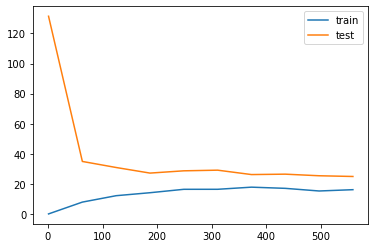

In [33]:
# Just run the following code, do not modify it
X, y = get_dataset_regression(n_samples=800, std=30, inner_std=10)
train_func, test_func = train_dt, test_dt
param=5
sizes, train_errors, test_errors = compute_learning_curve(train_func, test_func, param, X, y, test_size=.3, n_steps=10, n_repetitions=100)
e = estimate_asymptotic_error(sizes, train_errors, test_errors)
print('Asymptotic error: %.1f'%e)
plot_learning_curve(sizes, train_errors, test_errors)

## Question 14 [marks 6]

Make a function `bias2, variance = compute_bias_variance(predictions_dict, targets)` that takes in input a dictionary of lists of predictions indexed by the instance index, and the target vector. The function should compute the squared bias component of the error and the variance components of the error for each instance.

As a toy example consider: `predictions_dict={0:[1,1,1], 1:[1,-1], 2:[-1,-1,-1,1]}` and `targets=[1,1,-1]`, that is, for instance with index 0 there are 3 predictions available `[1,1,1]`, instead for instance with index 1 there are only 2 predictions available `[1,-1]`, etc. In this case, you should get `bias2=[0.  , 1.  , 0.25]` and `variance=[0.  , 1.  , 0.75]`.

Note that if you apply Bessel's correction and divide by the number of instances - 1 rather than by the number of instance you will obtain, for small datasets, slightly different results (e.g. `variance=[[0. , 2. , 1.]` in the example). Either solutions are acceptable.

In [34]:
def compute_bias_variance(predictions_dict, targets): 
    bias2 = []
    var = []
    
    for i in range(len(targets)):
        bias = 0
        for j in predictions_dict[i]:
            bias += (targets[i] - j)**2
        bias2.append(bias/len(predictions_dict[i])**2)
        var.append(np.var(predictions_dict[i]))
    
    return bias2, var

In [35]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 15 [marks 10]

Make a function `bias2, variance = bias_variance_decomposition(train_func, test_func, param, data_matrix, targets, n_bootstraps)` to compute the bias variance decomposition of the error of a regressor on a given problem. The regressor will be trained via `train_func` on the problem `data_matrix`, `targets` with parameter `param`. The estimate will be done using a number of replicates equal to `n_bootstraps`.

In [36]:
def bias_variance_decomposition(train_func, test_func, param, data_matrix, targets, n_bootstraps):
    reg = train_func(data_matrix, targets, param)
    predictions = {}
    for i in range(len(targets)):
        predictions[i] = []
    
    for n in range(n_bootstraps):
        testX, testY, testIndices,_,_,_ = make_bootstrap(data_matrix, targets)
        preds = test_func(testX, reg)
        for i in range(len(preds)):
            predictions[testIndices[i]].append(preds[i])

    return compute_bias_variance(predictions, targets)

In [37]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [38]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 16 [marks 2]

Consider the following regression problem (it does not matter that the target is only 1 and -1):

```python
from sklearn.datasets import load_iris

def make_iris_data():
    X,y = load_iris(return_X_y=True)
    X=X[:,[0,2]]
    y[y==2]=0
    y[y==0]=-1
    return X,y
```

Estimate the squared bias and variance component for each instance.  

Consider as regressor a linear svm and a polynomial svm with degree 3.

What is the class of the instances that have the highest bias error on average?

In [39]:
# Just run the following code, do not modify it
from sklearn.datasets import load_iris

def make_iris_data():
    X,y = load_iris(return_X_y=True)
    X=X[:,[0,2]]
    y[y==2]=0
    y[y==0]=-1
    return X,y

X,y = make_iris_data()

bias2, variance = bias_variance_decomposition(train_svm_1, test_svm, param=2, data_matrix=X, targets=y, n_bootstraps=100)
print(np.mean(bias2[y==1]) , np.mean(bias2[y==-1]))
bias2, variance = bias_variance_decomposition(train_svm_3, test_svm, param=2, data_matrix=X, targets=y, n_bootstraps=100)
print(np.mean(bias2[y==1]) , np.mean(bias2[y==-1]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [40]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 17 [marks 6]

Make a function `bs,vs = compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)` to compute the average squared bias error component and the average variance component of the error for each parameter setting in the vector `params`. The regressor will be trained via `train_func` on the problem `data_matrix`, `targets` with parameter `param`. The estimate will be done using a number of replicates equal to `n_bootstraps`. To be clear, the vector `bs` contains the average square bias error for each parameter in `params` and the vector `vs` contains the average variance error for each parameter in `params`.

In [41]:
def compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps):
    biases, variances = [], []
    
    for param in params:
        bias, variance = bias_variance_decomposition(train_func, test_func, param, data_matrix, targets, n_bootstraps)
        biases.append(np.mean(bias))
        variances.append(np.mean(variance))
    
    return biases, variances

In [42]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 18 [marks 1]

Make a function `plot_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps, logscale=False)`.

You should plot the individual components or the squared bias, the variance and the total error. You should allow the possibility to employ a logarithmic scale for the horizontal axis via the `logscale` flag.

You should get something like:

<img src='plot18.png' width=400>

In [43]:
def plot_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps, logscale=False):
    bs, vs = compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)
    es = [bs[i] + vs[i] for i in range(len(bs))]
    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax.plot(params, bs, label='bias2')
    ax.plot(params, vs, label='variance')
    ax.plot(params, es, label='error')
    if logscale:
        ax.set_xscale('log')
    else:
        ax.set_xscale('linear')
    fig.legend()
    fig.show()

In [44]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 19 [marks 2]

Make a function `find_best_param_with_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)` that uses the bias variance decomposition analysis to determine which parameter among `params` achieves the smallest estimated predictive error.

In [45]:
def find_best_param_with_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps):
    bs, vs = compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)
    es = [bs[i] + vs[i] for i in range(len(bs))]
    
    return params[np.argmin(es)]

In [46]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 20 [marks 6]

When you execute the following code 
```python
X, y = get_dataset_regression(n_samples=400, std=10, inner_std=7)
params = np.linspace(1,30,30).astype(int)
train_func, test_func = train_dt, test_dt
p = find_best_param_with_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps=60)
print('Best parameter:%s'%p)
plot_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps=50, logscale=False)
```

You should get something like:

<img src='plot19.png' width=400>

The next unit tests will run your functions `find_best_param_with_bias_variance_decomposition` on an undisclosed dataset using as regressors:
- decision tree
- svm degree 3

and 3 marks will be awarded for each correct optimal parameter identified.

In [47]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [48]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 21 [marks 5]

Make a function `conf_mtx = confusion_table(targets, preds)` to output the confusion matrix as a 2 x 2 Numpy array. Rows indicate the prediction and columns the target. The cell element with index [0,0] should report the true positive count. 

Running the following code:

```python
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
y[y==2]=0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

models = train_knn(X_train, y_train, param=3)
preds = test_knn(X_test, models)
conf_mtx = confusion_table(y_test, preds)
print(conf_mtx)
```
you should obtain something similar to
```
[[16.  1.]
 [ 0. 28.]]
```
Note: the exact values can differ in your run

**Note:** do not use library functions to compute the result directly but implement your own version.

In [49]:
def confusion_table(targets, preds):
    K = len(np.unique(targets)) 
    result = np.zeros((2, 2))
    for i in range(len(targets)):
        result[targets[i]][preds[i]] += 1

    return result

In [50]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 22 [marks 1]

Make a function `error_from_confusion_table(confusion_table_func, targets, preds)` that takes in input the previous `confusion_table` function and returns the error, i.e. the fraction of predictions that do not agree with the targets.

In [51]:
def error_from_confusion_table(confusion_table_func, targets, preds):
    confusion_table = confusion_table_func(targets, preds)
    correct = 0

    for i in range(len(confusion_table)):
        correct += confusion_table[i][i]
    
    return 1 - (correct / len(targets))

In [52]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 23 [marks 12]

Make a function `predictions, out_targets = cross_validation_prediction(train_func, test_func, param, data_matrix, targets, kfold)` that estimates the predictions of a classifier trained via the function `train_func` with parameter `param` on the problem `data_matrix, targets` using a k-fold cross validation strategy with the number of folds indicated by `kfold`.

Since the order of the instances associated to the predictions can be different from the original order, the function is required to output also the corresponding target values in the array `out_targets` (i.e. the value in position 10 in `predictions` corresponds to the target value in position 10 in `out_targets` )

**Note:** do not use library functions (such as `KFold` or `StratifiedKFold`) but implement your own version of the cross validation.

In [53]:
import random

def cross_validation_prediction(train_func, test_func, param, data_matrix, targets, kfold):
    n = [i for i in range(len(targets))]
    random.shuffle(n)
    
    all_group_data = []
    all_group_targets = []
    group_size = len(targets)//kfold
    preds = []
    out_targets = []
    
    for i in range(kfold):
        group_data = []
        group_targets = []
        for j in range(group_size):
            group_data.append(data_matrix[n[i*group_size + j]])
            group_targets.append(targets[n[i*group_size + j]])
        all_group_data.append(np.array(group_data))
        all_group_targets.append(np.array(group_targets))
    
    for i in range(kfold):
        testX, testY = np.vstack(all_group_data[i]), np.vstack(all_group_targets[i])
        trainX, trainY = [], []
        for j in range(kfold):
            if j != i:
                trainX.extend(all_group_data[j])
                trainY.extend(all_group_targets[j])
        trainX = np.vstack(trainX)
        trainY = np.vstack(trainY)
        preds.append(test_func(testX, train_func(trainX, trainY, param)))
        out_targets.append(np.concatenate(testY))
        
    preds = np.concatenate(preds)
    out_targets = np.concatenate(out_targets)

    return preds, out_targets

In [54]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [55]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 24 [marks 5]

Make a function `mean_errors = compute_errors_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)` that returns the estimated average error for each parameter in `params`. The classifier is trained via the function `train_func` with parameters taken from `params` on the problem `data_matrix, targets` using a k-fold cross validation strategy with the number of folds indicated by `kfold`.
The error estimate is repeated a number of times indicated in `n_repetitions`. The error should be computed using the function `error_from_confusion_table`. The output vector `mean_errors` has as many entries as there are paramters in `params`.

**Note:** do not use library functions (such as `cross_val_score`) but implement your own version of the code.

In [68]:
def compute_errors_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions):
    mean_errors = []
    
    for param in params:
        mean_error = 0
        for _ in range(n_repetitions):
            error = 0
            preds, out_targets = cross_validation_prediction(train_func, test_func, param, data_matrix, targets, kfold)
            error += error_from_confusion_table(confusion_table, out_targets, preds)     
            
            mean_error += error/kfold
        mean_errors.append(mean_error/n_repetitions)
    return mean_errors

In [57]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 25 [marks 2]

Make a function `find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)` that uses crossvalidation to determine which parameter among `params` achieves the smallest estimated predictive error.

In [72]:
def find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions):
    errors = compute_errors_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)
    
    return params[np.argmin(errors)]

In [59]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 26 [marks 0]

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. Since this cell uses functions that you have already implemented and that have already been marked, this Question is not going to be marked.


You should be able to run the following code:
```python
from sklearn.datasets import load_wine
X,y = load_wine(return_X_y=True)
params = [3,5,7,9,11]
train_func, test_func = train_knn, test_knn
kfold = 5
n_repetitions = 5
best_param = find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)
print(best_param)
```
and get a value around 3.

In [90]:
# Just run the following code, do not modify it
from sklearn.datasets import load_wine
data_matrix, targets = load_wine(return_X_y=True)
params = [3,5,7,9,11]
train_func, test_func = train_knn, test_knn
kfold = 5
n_repetitions = 5
best_param = find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)
print(best_param)

3
